# Сборный проект

**Описание проекта:** 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Сравнение Москвы и Петербурга окружено мифами. Например:

**Цель исследования:** 
 - Выявить определяющие успешность игры закономерности. Сделать ставку на потенциально популярный продукт и помочь спланировать рекламные кампании.

**Ход исследования:**

Данные о поведении пользователей мы получим из файла `/datasets/games.csv`. О качестве данных ничего не известно, поэтому перед исследованием понадобится обзор данных. Затем мы проведем анализ данных, составим и проверим гипотезы, найдем закономерности, которые помогут спланировать рекламные кампании.
 
Таким образом, исследование пройдёт в 5 этапов:
 1. Обзор данных.
 2. Предобработка (подготовка) данных.
 3. Исследовательский анализ данных.
 4. Составим портрет пользователя каждого региона.
 5. Проверим гипотезы.
 6. Подведем итоги и сформулируем основные выводы.

**Шаг 1. Откроем файл с данными и изучим общую информацию.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
data=pd.read_csv('/datasets/games.csv', sep=',')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


**Вывод:** Изучила общую информацию о полученном датафрейме. Предстоит этап предобработки данных - вижу пропуски, неверные типы данных, некорректные наименования столбцов. Вперед!

**Шаг 2. Подготовим данные.**

**2.1** Приводим названия столбцов к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**2.2** Обработаем пропуски:

In [7]:
#name
data.dropna(subset=['name'], inplace=True)

#year_of_release
data.dropna(subset=['year_of_release'], inplace=True)

#genre
data.dropna(subset=['genre'], inplace=True)
data.isna().sum()

#user_score
data['user_score'].fillna(0, inplace=True)

**2.3** Преобразуем данные в нужные типы:

In [8]:
data['year_of_release']=data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


**Вывод:** Пропуски в name, year_of_release, genre встречаются редко, ввиду их незначительности и малого веса на результат-удалила. Возможными причинами вышеуказанных пропусков могут быть технический сбой, не посчитали нужным/забыли указать эти данные. <br>Пропуски в critic_score, rating оставила без изменений ("не делала замену ради замены"), т.к. замена такого количества данных может повлиять на результат исследования. Возможно, пропуски обусловлены тем, что игра новая и не успела получить свой рейтинг, оценку от пользователей и критиков.<br> Пропуски в user_score "маркировала" 0-м значением, т.к. ниже мне это понадобилось для операций с вычислениями. 
Заменила тип данных в стобце year_of_release на целые, а также после обработки 'tbd' в столбце user_score-на вещественные.

*Посмотрим на аббревиатуру 'tbd' в столбце с оценкой пользователей:*

In [9]:
data['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['user_score']=data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', nan, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
data['user_score']=data['user_score'].astype('float')
data['user_score'].dtype

dtype('float64')

**Вывод:** Количество tbd в нашей выборке 2376 шт. Согласно данным сайта https://www.mobilradio.ru/information/vocabulary/tbd.htm, TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.
Отсюда следует, что tbd равнозначны пропускам, следовательно, логично их заменить на NaN.

**2.4** Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [12]:
data['total_game'] =  data[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_game
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,0.0,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,0.0,NaN,28.31


**Шаг 3. Проведем исследовательский анализ данных.**

**3.1** Посмотрим, сколько игр выпускалось в разные годы. Проверим, важны ли данные за все периоды.

In [13]:
game_one_year=data.pivot_table(index=['year_of_release'], values='name', aggfunc='count').reset_index()
game_one_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


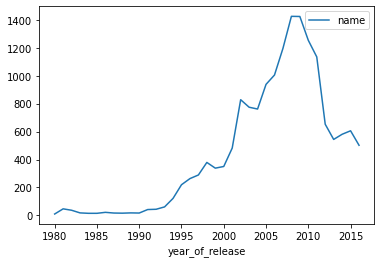

In [14]:
game_one_year=data.pivot_table(index=['year_of_release'], values='name', aggfunc='count').plot()

**Вывод:** С 1980 года количество выпущенных игр увеличивалось вплоть до 2010 года. С 2011 года видим планомерный спад. Наибольшее количество игр было выпущено в 2005-2011 г.<br> Оставим данные за актуальный период. Основной фактор - эти данные помогут построить прогноз на 2017 год. <br>Данные по 2012 - 2016 годам имеют малый разбос в количестве выпущенных игр, поэтому считаю корректным строить прогноз на основании наиболее актуальных данных - за последние 3 года.

**3.2** Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам, а также определим срок, за который появляются новые и исчезают старые платформы.

*Сначала изучим, за какой характерный срок появляются новые и исчезают старые платформы:*

In [15]:
temp = (data.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       )
temp

,year_of_release
platform,
2600,10
3DO,2
3DS,6
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


In [16]:
temp.year_of_release.describe() 

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

In [17]:
len(data['platform'].unique())/len(data['year_of_release'].unique())

0.8378378378378378

**Вывод:** Средняя продложительность существования платформы составляет 7 лет. Если брать в расчет весь изучаемый период, в среднем новая платформа выходила 1 раз в год.

**3.3.** Посмотрим, как менялись продажи по платформам. Для этого выберем платформы с наибольшими суммарными продажами за период, который мы определили как актуальный:

In [18]:
data=data[data['year_of_release'] > 2013]
count_platform = data.groupby(['platform', 'year_of_release'])['platform'].count()
count_platform

platform  year_of_release
3DS       2014                80
          2015                86
          2016                46
PC        2014                47
          2015                50
          2016                54
PS3       2014               108
          2015                73
          2016                38
PS4       2014                75
          2015               137
          2016               164
PSP       2014                10
          2015                 3
PSV       2014               100
          2015               110
          2016                85
Wii       2014                 6
          2015                 4
          2016                 1
WiiU      2014                31
          2015                28
          2016                14
X360      2014                63
          2015                35
          2016                13
XOne      2014                61
          2015                80
          2016                87
Name: platform, d

Text(0, 0.5, 'Продажи')

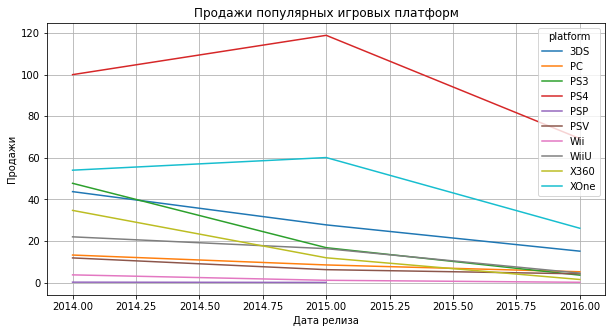

In [19]:
data.pivot_table(index='year_of_release', columns = 'platform', values='total_game', aggfunc='sum').plot(grid=True, figsize=(10, 5))
plt.title('Продажи популярных игровых платформ')
plt.xlabel('Дата релиза')
plt.ylabel('Продажи')

**Вывод:** Наибольшие суммарные продажи в 2014-2016 г. имели платформы PS4, XOne, 3DS. Оставим платформы с наибольшими суммарными продажами (PS4, XOne) и построим распределение по годам:

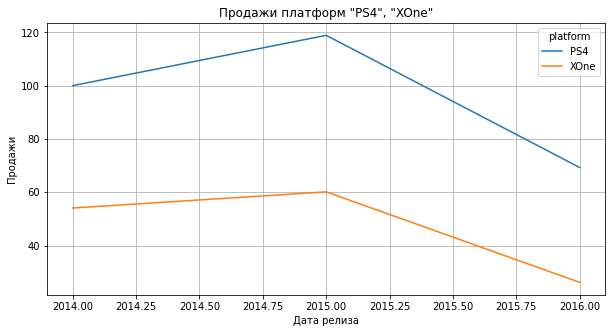

In [20]:
data_best_game = data.query("platform == ['PS4', 'XOne']")
data_best_game.pivot_table(index='year_of_release', columns = 'platform', values='total_game', aggfunc='sum').plot(grid=True, figsize=(10, 5))
plt.title('Продажи платформ "PS4", "XOne"')
plt.xlabel('Дата релиза')
plt.ylabel('Продажи')
plt.show()

**Вывод:** Исходя из нашего исследования, можно сделать вывод, что с наибольшей вероятностью принесут прибыль PS4, XOne. Наблюдаем рост до 2015 года, затем небольшой спад. 

**3.4** Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

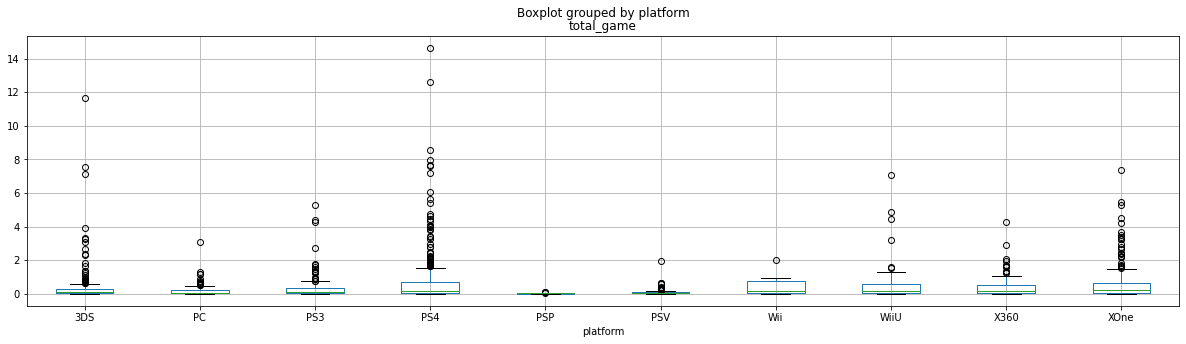

In [21]:
data.boxplot(column='total_game', by='platform',  figsize=(20,5))
plt.show()

Для более точных выводов зададим параметр ylim:

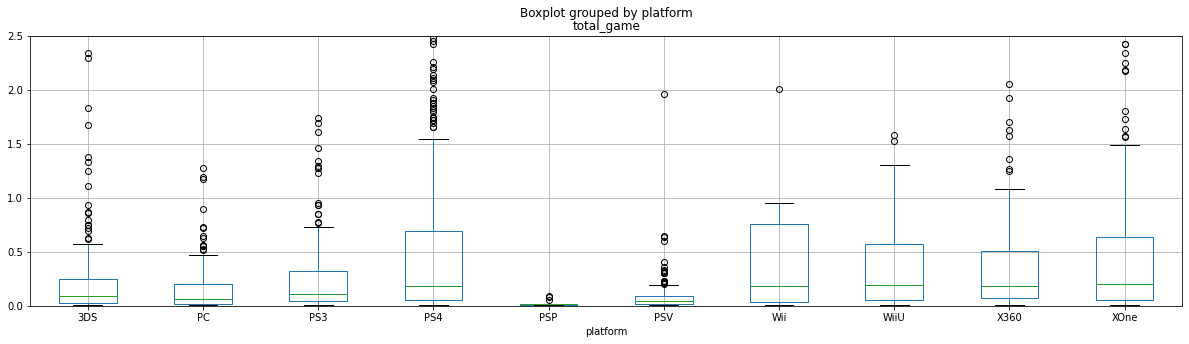

In [22]:
data.boxplot(column='total_game', by='platform',  figsize=(20,5))
plt.ylim(0, 2.5)
plt.show()

**Вывод:** По диаграмме видим наибольшие межквартальные размахи, медианы у платформ PS4, XOne, Wii. Отсюда следует, что они имеют наибольшие продажи и популярность. Остальные платформы менее потенциально выгодны.

**3.4** Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

За популярную платформу возьмем PS4. <br>Диаграмма рассеяния по оценкам пользователей:

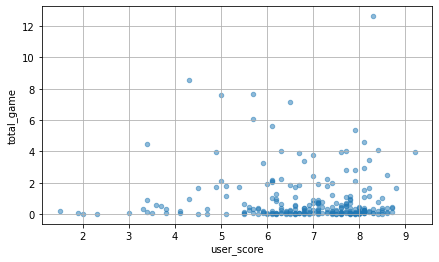

In [23]:
data = data[data['user_score'] != 0]
data[data['platform']=='PS4'].plot(x='user_score', y='total_game', kind='scatter', alpha=0.5, figsize=(7,4), grid=True)
plt.show()

Корреляция:

In [24]:
platform_ps4 = data[data['platform']=='PS4']
platform_ps4_cor = platform_ps4['user_score'].corr(platform_ps4['total_game'])
platform_ps4_cor

-0.040131589472697356

**Вывод:** Корреляция между оценками пользователей и продажами слабая. Следовательно, отзывы не являются весомым поводом купить игру.

Диаграмма рассеяния по оценкам критиков:

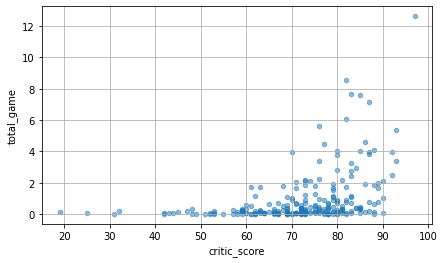

In [25]:
data[data['platform']=='PS4'].plot(x='critic_score', y='total_game', kind='scatter', alpha=0.5, figsize=(7,4), grid=True)
plt.show()

Корреляция:

In [26]:
platform_ps4 = data[data['platform']=='PS4']
platform_ps4_cor = platform_ps4['critic_score'].corr(platform_ps4['total_game'])
platform_ps4_cor

0.40207568517651665

**Вывод:** Корреляция между оценками критиков и продажами слабая, но сильнее, чем между оценками пользователей и продажами. 

**3.5** Соотнесем выводы с продажами игр на других платформах.

In [27]:
data['platform'].unique()

array(['PS4', 'WiiU', 'XOne', 'PS3', 'X360', '3DS', 'PC', 'Wii', 'PSV'],
      dtype=object)

Корреляция для '3DS':

In [28]:
platform_3DS = data[data['platform']=='3DS']
platform_3DS_cor = platform_3DS['critic_score'].corr(platform_3DS['total_game'])
platform_3DS_cor

0.314117492869051

In [29]:
platform_3DS = data[data['platform']=='3DS']
platform_3DS_cor = platform_3DS['user_score'].corr(platform_3DS['total_game'])
platform_3DS_cor

0.2151932718527028

Корреляция для 'XOne':

In [30]:
platform_XOne = data[data['platform']=='XOne']
platform_XOne_cor = platform_XOne['critic_score'].corr(platform_XOne['total_game'])
platform_XOne_cor

0.42684293039389043

In [31]:
platform_XOne = data[data['platform']=='XOne']
platform_XOne_cor = platform_XOne['user_score'].corr(platform_XOne['total_game'])
platform_XOne_cor

-0.0703839280647581

Корреляция для 'WiiU':

In [32]:
platform_WiiU = data[data['platform']=='WiiU']
platform_WiiU_cor = platform_WiiU['critic_score'].corr(platform_WiiU['total_game'])
platform_WiiU_cor

0.370201412480884

In [33]:
platform_WiiU = data[data['platform']=='WiiU']
platform_WiiU_cor = platform_WiiU['user_score'].corr(platform_WiiU['total_game'])
platform_WiiU_cor

0.40792645792170773

Корреляция для 'PS3':

In [34]:
platform_PS3 = data[data['platform']=='PS3']
platform_PS3_cor = platform_PS3['critic_score'].corr(platform_PS3['total_game'])
platform_PS3_cor

0.44657460493190704

In [35]:
platform_PS3 = data[data['platform']=='PS3']
platform_PS3_cor = platform_PS3['user_score'].corr(platform_PS3['total_game'])
platform_PS3_cor

-0.16676141347662118

Корреляция для 'X360':

In [36]:
platform_X360 = data[data['platform']=='X360']
platform_X360_cor = platform_X360['critic_score'].corr(platform_X360['total_game'])
platform_X360_cor

0.5257228356581523

In [37]:
platform_X360 = data[data['platform']=='X360']
platform_X360_cor = platform_X360['user_score'].corr(platform_X360['total_game'])
platform_X360_cor

-0.138444570945665

Корреляция для 'PC':

In [38]:
platform_PC = data[data['platform']=='PC']
platform_PC_cor = platform_PC['critic_score'].corr(platform_PC['total_game'])
platform_PC_cor

0.17206091490145103

In [39]:
platform_PC = data[data['platform']=='PC']
platform_PC_cor = platform_PC['user_score'].corr(platform_PC['total_game'])
platform_PC_cor

-0.07159665703472451

**Корреляция для 'Wii':**

In [40]:
platform_Wii = data[data['platform']=='Wii']
platform_Wii_cor = platform_Wii['critic_score'].corr(platform_Wii['total_game'])
platform_Wii_cor

nan

In [41]:
data.query('platform == "Wii"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_game
850,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.0,0.17,NaN,8.4,E10+,2.01
2179,Just Dance 2016,Wii,2015,Misc,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
2180,Skylanders: Trap Team,Wii,2014,Action,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
3611,FIFA 15,Wii,2014,Sports,0.15,0.37,0.0,0.04,NaN,4.3,E,0.56
7991,How to Train Your Dragon 2,Wii,2014,Adventure,0.04,0.13,0.0,0.01,NaN,NaN,E10+,0.18
8009,Just Dance 2017,Wii,2016,Misc,0.06,0.11,0.0,0.01,NaN,NaN,E10+,0.18
14682,Barbie and Her Sisters Puppy Rescue,Wii,2015,Action,0.00,0.03,0.0,0.00,NaN,NaN,E,0.03
16144,Penguins of Madagascar,Wii,2014,Action,0.00,0.01,0.0,0.00,NaN,NaN,E,0.01
16312,Monster High: New Ghoul in School,Wii,2015,Action,0.00,0.01,0.0,0.00,NaN,NaN,E,0.01


Платформа 'Wii' не имеет оценок от критиков.

In [42]:
platform_Wii = data[data['platform']=='Wii']
platform_Wii_cor = platform_Wii['user_score'].corr(platform_Wii['total_game'])
platform_Wii_cor

1.0

Корреляция для 'PSV':

In [43]:
platform_PSV = data[data['platform']=='PSV']
platform_PSV_cor = platform_PSV['critic_score'].corr(platform_PSV['total_game'])
platform_PSV_cor

0.04266490657009526

In [44]:
platform_PSV = data[data['platform']=='PSV']
platform_PSV_cor = platform_PSV['user_score'].corr(platform_PSV['total_game'])
platform_PSV_cor

-0.16845504978064446

**Корреляция для 'PSP':**

In [45]:
platform_PSP = data[data['platform']=='PSP']
platform_PSP_cor = platform_PSP['critic_score'].corr(platform_PSP['total_game'])
platform_PSP_cor

nan

In [46]:
data.query('platform == "PSP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_game


In [47]:
platform_PSP = data[data['platform']=='PSP']
platform_PSP_cor = platform_PSP['user_score'].corr(platform_PSP['total_game'])
platform_PSP_cor

nan

Платформа 'PSP' не имеет оценок от критиков и пользователей.

Посмотрим корреляции на графиках:

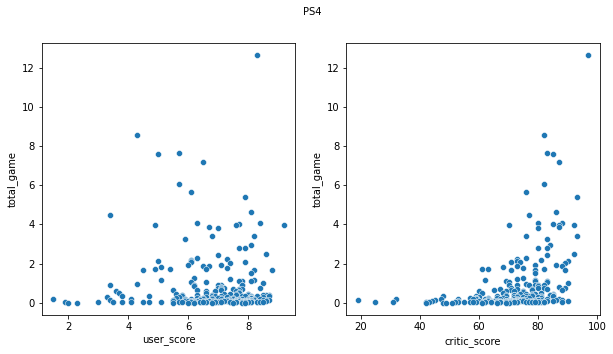

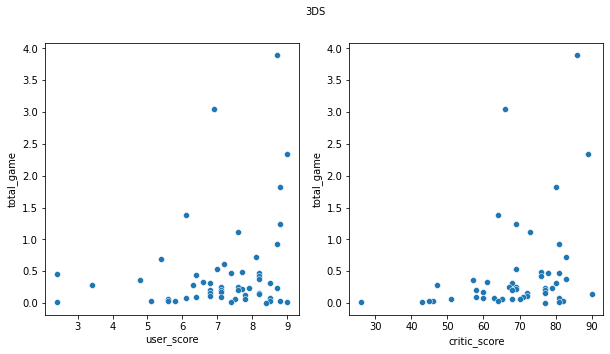

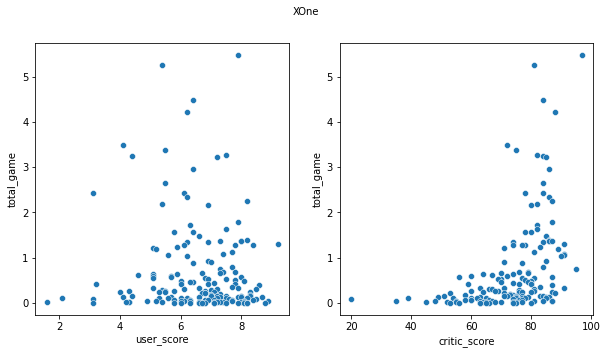

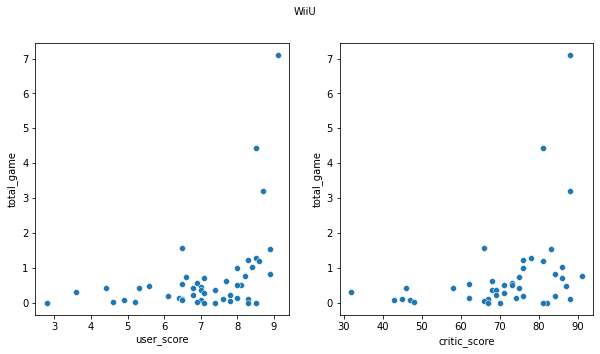

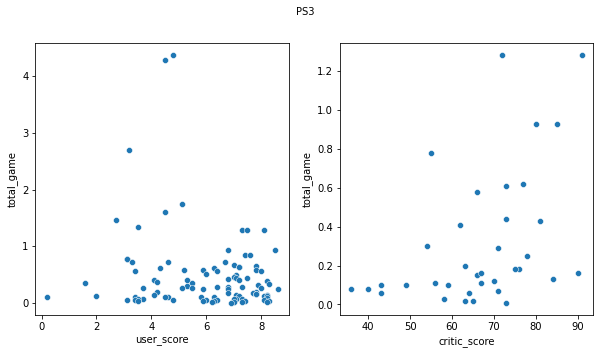

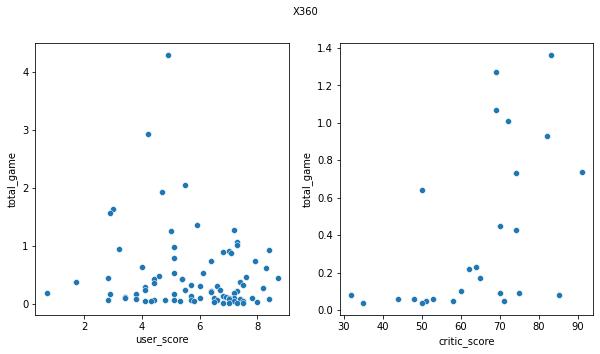

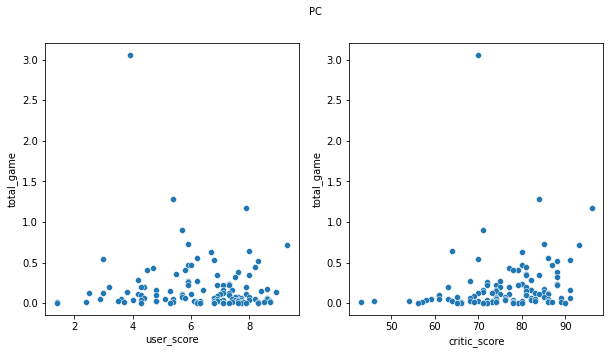

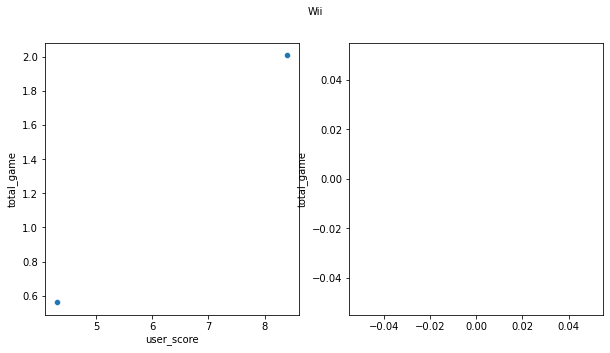

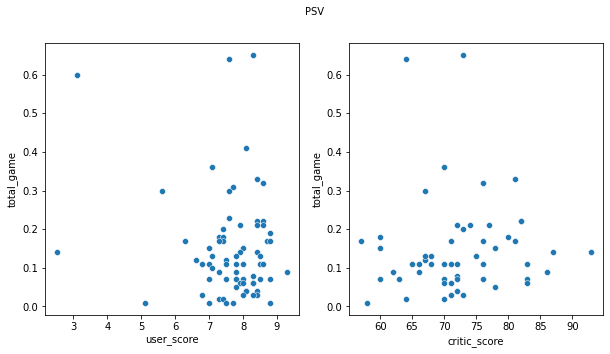

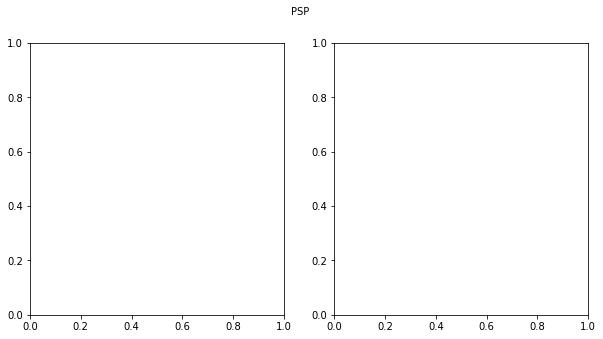

In [48]:
list_of_platform = ['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV','PSP']
def other_platform(name_platform):
    platform = data[data['platform']==name_platform]
    figsize, ax = plt.subplots(1,2, figsize=(10,5))
    sns.scatterplot(x='user_score', y='total_game', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_game', data=platform, ax=ax[1])
    figsize.suptitle(name_platform, fontsize=10)
    plt.show()
    
for platform in list_of_platform:
    other_platform(platform)
    


**Вывод:** Корреляция есть у всех платформ, кроме 'Wii' (от критиков), 'PSP' (от критиков и пользователей). Зависимость продаж от оценок критиков выше, чем от оценок пользователей, отсюда следует, что потенциальный покупатель больше доверяет критикам.

**3.6** Посмотрим на общее распределение игр по жанрам.

In [49]:
distribution_genre = data.pivot_table(index='genre', values='total_game', aggfunc='sum').sort_values(by='total_game', ascending=False)
distribution_genre

,total_game
genre,
Action,149.81
Shooter,130.07
Sports,107.49
Role-Playing,51.59
Racing,23.35
Misc,17.57
Platform,16.17
Fighting,13.67
Simulation,10.05


In [50]:
distribution_genre.describe()

,total_game
count,12.000000
mean,44.324167
std,53.494645
min,1.400000
25%,9.550000
50%,16.870000
75%,65.565000
max,149.810000


*Предварительный вывод: наиболее прибыльным является жанр 'Action' (199.36). Замыкает рейтинг 'Puzzle' (2.21). Для более точных выводов найдем жанр, где игры стабильно приносят высокий доход - для этого рассмотрим средние и медианные продажи:*

In [51]:
data.groupby('genre').median()['total_game'].sort_values(ascending=False)

genre
Shooter         0.490
Sports          0.360
Misc            0.250
Role-Playing    0.170
Fighting        0.150
Platform        0.140
Action          0.130
Strategy        0.105
Racing          0.105
Simulation      0.105
Adventure       0.070
Puzzle          0.025
Name: total_game, dtype: float64

In [52]:
data.groupby('genre').mean()['total_game'].sort_values(ascending=False)

genre
Shooter         1.151062
Sports          0.784599
Role-Playing    0.491333
Platform        0.490000
Action          0.444540
Racing          0.432407
Simulation      0.358929
Fighting        0.350513
Misc            0.331509
Puzzle          0.175000
Strategy        0.148333
Adventure       0.143750
Name: total_game, dtype: float64

**Вывод:** Наиболее прибыльным является жанр 'Shooter'. Замыкает рейтинг 'Puzzle', за более точный результат приняла медианные значения. 

**Шаг 4. Составим портрет пользователя каждого региона.**

**4.1.** Определим для пользователя каждого региона самые популярные платформы.

Популярные платформы NA:

In [53]:
na_popular_platforms = data.groupby('platform').na_sales.mean().sort_values(ascending=False).head()
na_popular_platforms

platform
XOne    0.382557
PS4     0.302863
WiiU    0.292264
X360    0.269130
Wii     0.228889
Name: na_sales, dtype: float64

Популярные платформы EU:

In [54]:
eu_popular_platforms = data.groupby('platform').eu_sales.mean().sort_values(ascending=False).head()
eu_popular_platforms

platform
PS4     0.411411
Wii     0.270000
XOne    0.217841
WiiU    0.211321
PS3     0.167667
Name: eu_sales, dtype: float64

Популярные платформы JP:

In [55]:
jp_popular_platforms = data.groupby('platform').jp_sales.mean().sort_values(ascending=False).head()
jp_popular_platforms

platform
3DS     0.133421
WiiU    0.109057
PSV     0.063250
PS3     0.044417
PS4     0.034315
Name: jp_sales, dtype: float64

In [56]:
popular_platforms = pd.DataFrame(data=[na_popular_platforms, eu_popular_platforms, jp_popular_platforms]).T
popular_platforms

,na_sales,eu_sales,jp_sales
platform,,,
XOne,0.382557,0.217841,NaN
PS4,0.302863,0.411411,0.034315
WiiU,0.292264,0.211321,0.109057
X360,0.269130,NaN,NaN
Wii,0.228889,0.270000,NaN
PS3,NaN,0.167667,0.044417
3DS,NaN,NaN,0.133421
PSV,NaN,NaN,0.063250


<AxesSubplot:xlabel='platform'>

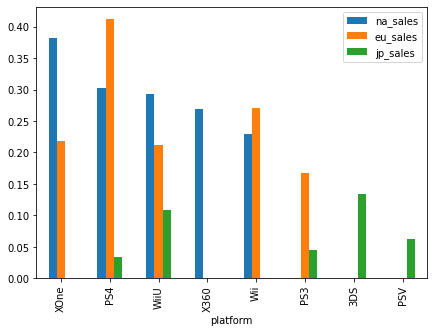

In [57]:
popular_platforms.plot(kind='bar',figsize=(7,5))

**Вывод:** В Америке наибольшей популярностью пользуется платформа XOne. Платформы WiiU, PS4, X360 имеют приблизительно одинаковые продажи, но отстают от XOne примерно на 30%. Замыкает рейтинг Wii. <br> В Европе популярна PS4, затем по убыванию - примерно на 40% отстают WiiU, XOne, WiiU. Замыкает рейтинг X360. <br> В Японии самая популярная игра - 3DS. В 2 раза меньше продаж у WiiU, и относительно не популярны платформы PS3, PSV, PS4.

**4.2.** Определим для пользователя каждого региона самые популярные жанры.

Популярные жанры NA:

In [58]:
na_popular_genre = data.groupby('genre').na_sales.mean().sort_values(ascending=False).head()
na_popular_genre

genre
Shooter         0.533717
Sports          0.336131
Platform        0.186364
Role-Playing    0.182476
Action          0.176884
Name: na_sales, dtype: float64

Популярные жанры EU:

In [59]:
eu_popular_genre = data.groupby('genre').eu_sales.mean().sort_values(ascending=False).head()
eu_popular_genre

genre
Shooter       0.438938
Sports        0.331460
Racing        0.215370
Simulation    0.201786
Action        0.185134
Name: eu_sales, dtype: float64

Популярные жанры JP:

In [60]:
jp_popular_genre = data.groupby('genre').jp_sales.mean().sort_values(ascending=False).head()
jp_popular_genre

genre
Role-Playing    0.094571
Platform        0.077273
Simulation      0.067500
Fighting        0.052821
Shooter         0.036903
Name: jp_sales, dtype: float64

In [61]:
popular_genre = pd.DataFrame(data=[na_popular_genre, eu_popular_genre, jp_popular_genre]).T
popular_genre

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,0.533717,0.438938,0.036903
Sports,0.336131,0.331460,NaN
Platform,0.186364,NaN,0.077273
Role-Playing,0.182476,NaN,0.094571
Action,0.176884,0.185134,NaN
Racing,NaN,0.215370,NaN
Simulation,NaN,0.201786,0.067500
Fighting,NaN,NaN,0.052821


<AxesSubplot:xlabel='genre'>

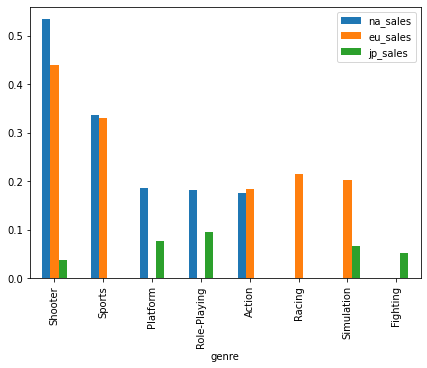

In [62]:
popular_genre.plot(kind='bar',figsize=(7,5))

**Вывод:** В Америке наибольшей популярностью пользуется жанр Shooter. В 3 раза менее популярен Sports, затем, по убыванию - Fighting, Platform, Role-Playing. <br> В Европе, как и в Америке, лидирует Shooter, в 2 раза менее популярен Sports, замыкают рейтинг Racing, Platform, Simulation. <br> В Японии предпочитают Role-Playing, на 30% менее популярны Fighting, и далее по убыванию рейтинга популярности среди жанров: Platform, Puzzle, Simulation.

**4.3.** Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Рейтинг ESRB в NA.

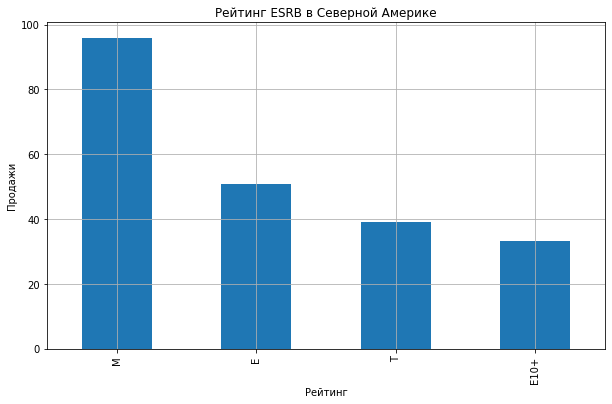

In [63]:
esrb_na = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(10,6), grid=True, title = 'Рейтинг ESRB в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

Рейтинг ESRB в EU.

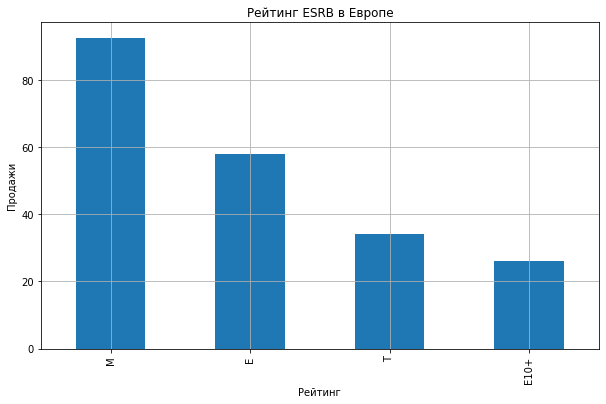

In [64]:
esrb_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(10,6), grid=True, title = 'Рейтинг ESRB в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

Рейтинг ESRB в JP.

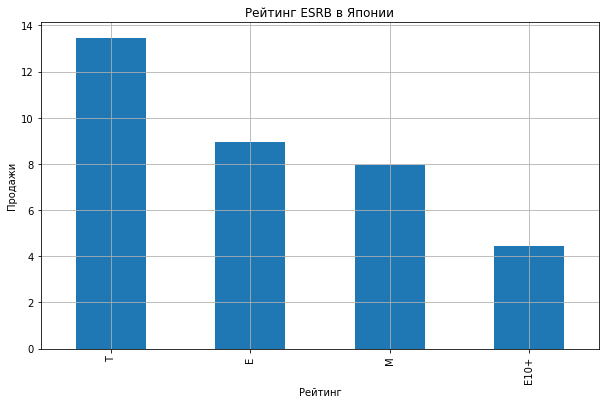

In [65]:
esrb_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
esrb_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(10,6), grid=True, title = 'Рейтинг ESRB в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

**Вывод:** В Северной Америке и Европе лидируют рейтинги "М", в Японии - "Т". Во всех регионах на втором месте идут рейтинги "Е". Остальные категории менее популярны. Таким образом, рейтинг ESRB влияет на продажи во всех регионах, т.к. продажи с категориями от  ESRB выше, чем без категорий.

**Шаг 5.** Проверим гипотезы.

**5.1.** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза H0-средние пользовательские рейтинги платформ Xbox One и PC одинаковые. <br> Гипотеза H1-средние пользовательские рейтинги платформ Xbox One и PC разные.


In [66]:
data.dropna(subset=['user_score'], inplace=True)

In [67]:
data = data[data['user_score'] != 0]
data_xbox = data[data['platform'] == 'XOne']
data_pc = data[data['platform'] == 'PC']

xbox_1 = data_xbox['user_score']
pc_1 = data_pc['user_score']

alpha = .05 

results = st.ttest_ind(
    xbox_1,
    pc_1)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Вывод:** p-уровень значимости более 5%, следовательно, отвергать нулевую гипотезу нельзя.

**5.2.** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотеза H0-средние пользовательские рейтинги платформ Action и Sports одинаковые. <br> Гипотеза H1-средние пользовательские рейтинги платформ Action и Sports разные. <br> Для проверки гипотез используем scipy.stats.ttest_ind-метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.


In [68]:
data.dropna(subset=['user_score'], inplace=True)
data_action = data[data['genre'] == 'Action']
data_sports = data[data['genre'] == 'Sports']

action_1 = data_action['user_score']
sports_1 = data_sports['user_score']

alpha = .05 

results = st.ttest_ind(
    action_1,
    sports_1)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Вывод:** p-уровень значимости менее 5%, следовательно, отвергаем нулевую гипотезу.

**Шаг 6. Общий вывод.**

Первым делом я выполнила предобработку данных и изучила общую информацию.

Вторым шагом - изучила пропуски, изменила типы данных и заполнила пропуски там, где это возможно и логично.
Пропуски в name, year_of_release, genre встречаются редко, ввиду их незначительности и малого веса на результат-удалила. Возможными причинами вышеуказанных пропусков могут быть технический сбой, не посчитали нужным/забыли указать эти данные.
Пропуски в critic_score, rating оставила без изменений, т.к. замена такого количества данных может повлиять на результат исследования. Возможно, пропуски обусловлены тем, что игра новая и не успела получить свой рейтинг, оценку от пользователей и критиков.
Пропуски в user_score "маркировала" 0-м значением, т.к. мне это понадобилось для операций с вычислениями. Заменила тип данных в стобце year_of_release на целые, а также после обработки 'tbd' в столбце user_score-на вещественные.

Далее провела исследовательский анализ данных. Данные по 2012 - 2016 годам имеют малый разбос в количестве выпущенных игр, построила прогноз на основании наиболее актуальных данных - за последние 3 года. 

Рассчитала среднюю продложительность существования платформы - 7 лет. Если брать в расчет весь изучаемый период, в среднем новая платформа выходила 1 раз в год.

Наибольшие суммарные продажи в 2014-2016 г. имели платформы PS4, XOne, 3DS. Исходя из графиков, с наибольшей вероятностью принесут прибыль PS4, XOne. Наблюдаем рост до 2015 года, затем небольшой спад.

Рассчитала корреляцию между оценками пользователей, оценками критиков и продажами для самой популярной платформы - 'PS4'.
Корреляция между оценками критиков и продажами слабая, но сильнее, чем между оценками пользователей и продажами. Относительно остальных платформ- корреляция есть у всех, кроме 'Wii' (от критиков), 'PSP' (от критиков и пользователей). Зависимость продаж от оценок критиков выше, чем от оценок пользователей, отсюда следует, что потенциальный покупатель больше доверяет критикам.

Наиболее прибыльным является жанр 'Shooter'. Замыкает рейтинг 'Puzzle'

В Америке наибольшей популярностью пользуется платформа XOne. Платформы WiiU, PS4, X360 имеют приблизительно одинаковые продажи, но отстают от XOne примерно на 30%. Замыкает рейтинг Wii.
В Европе популярна PS4, затем по убыванию - примерно на 40% отстают WiiU, XOne, WiiU. Замыкает рейтинг X360.
В Японии самая популярная игра - 3DS. В 2 раза меньше продаж у WiiU, и относительно не популярны платформы PS3, PSV, PS4.

В Америке наибольшей популярностью пользуется жанр Shooter. В 3 раза менее популярен Sports, затем, по убыванию - Fighting, Platform, Role-Playing.
В Европе, как и в Америке, лидирует Shooter, в 2 раза менее популярен Sports, замыкают рейтинг Racing, Platform, Simulation.
В Японии предпочитают Role-Playing, на 30% менее популярны Fighting, и далее по убыванию рейтинга популярности среди жанров: Platform, Puzzle, Simulation.

В Северной Америке и Европе лидируют рейтинги "М", в Японии - "Т". Во всех регионах на втором месте идут рейтинги "Е". Остальные категории менее популярны. Таким образом, рейтинг ESRB влияет на продажи во всех регионах, т.к. продажи с категориями от ESRB выше, чем без категорий.

Заключительным шагом проверила гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (результат: p-уровень значимости более 5%, следовательно, отвергать нулевую гипотезу нельзя). У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (результат: p-уровень значимости менее 5%, следовательно, отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Action и Sports разные.

Исходя из всех данных предполагаю, что лучше всего продавать игры для таких приставок как PS4, жанр необходимо выбирать Shooter, рейтинг - М.